# [실습] PCA
- PCA를 적용하기 전에 개별 속성에 대해 scaling을 진행해야한다.(각 열에 대해 진행됨)
- PC1 : 72 % , PC2: 22%으로 두개 요소로만 변환해도 원본데이터의 변동성을 95%를 설명핼수 있다. 
- 원본 데이터로 계산한 예측성능 보다 차원축소한 데이터로 계산한 예측성능이 더 떨어진다.

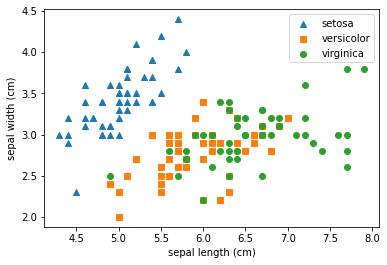

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [37]:
 from sklearn.datasets import load_iris
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt

iris = load_iris()
irisDF = pd.DataFrame(data=iris.data,columns=iris.feature_names)
irisDF['target'] = iris.target

markers=['^','s','o']
for i,marker in enumerate(markers):
    x = irisDF[irisDF['target']==i]['sepal length (cm)']
    y = irisDF[irisDF['target']==i]['sepal width (cm)']
    plt.scatter(x,y,marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel('sepal length (cm)')                
plt.ylabel('sepal width (cm)')                
plt.show()

# PCA를 적용하기 전에 개별 속성에 대해 scaling을 진행해야한다.(각 열에 대해 진행됨)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(irisDF.iloc[:,:-1])
print(irisDF.iloc[:5,:-1])
print(scaled_data[:5])

pca component :  [0.72962445 0.22850762]
        PC1       PC2  target
0 -2.264703  0.480027       0
1 -2.080961 -0.674134       0
2 -2.364229 -0.341908       0


Text(0, 0.5, 'PC2 :22.85%')

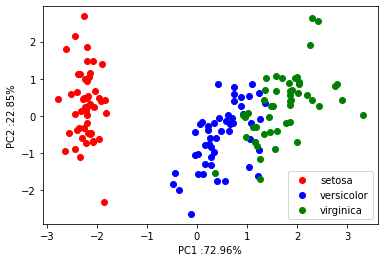

In [46]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
pca.fit(scaled_data)
iris_pca= pca.transform(scaled_data)
print('pca component : ',pca.explained_variance_ratio_);print('='*50)

irisDF_pca = pd.DataFrame(data=iris_pca,columns=['PC1','PC2'])
irisDF_pca['target']=iris.target
print(irisDF_pca.head(3))
colors=['red','blue','green']
for i,color in enumerate(colors):
    x = irisDF_pca[irisDF_pca['target']==i]['PC1']
    y = irisDF_pca[irisDF_pca['target']==i]['PC2']
    plt.scatter(x,y,c=color,label=iris.target_names[i])
plt.legend()
plt.xlabel('PC1 :'+str(np.round(pca.explained_variance_ratio_[0]*100,2))+'%')
plt.ylabel('PC2 :'+str(np.round(pca.explained_variance_ratio_[1]*100,2))+'%')

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

dt_clf = RandomForestClassifier(n_estimators=100, random_state=0)
scores= cross_val_score(dt_clf,iris.data,iris.target, scoring='accuracy',cv=3)
print('원본 데이터 교차검증 개별 정확도 : ', np.round(scores,2))
print('평균 정확도 : ', np.round(np.mean(scores),2));print('='*50)

scores= cross_val_score(dt_clf,irisDF_pca.iloc[:,:-1],irisDF_pca.target, scoring='accuracy',cv=3)
print('PCA 변환 데이터 교차검증 개별 정확도 : ', np.round(scores,2))
print('평균 정확도 : ', np.round(np.mean(scores),2))


원본 데이터 교차검증 개별 정확도 :  [0.98 0.94 0.98]
평균 정확도 :  0.97
PCA 변환 데이터 교차검증 개별 정확도 :  [0.88 0.88 0.9 ]
평균 정확도 :  0.89


# [실습] LDA

# [실습] SVD

# [실습] NMF